<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana14/PruebasHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial

In [13]:
Prior = np.array([0.4,0.3,0.2,0.1])

<StemContainer object of 3 artists>

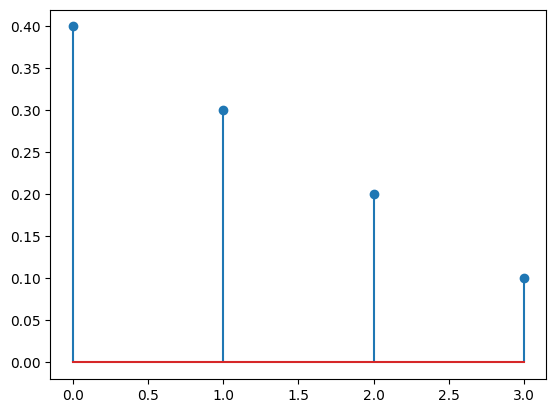

In [14]:
plt.stem(Prior)

In [15]:
X = np.array([1,2,3,4])

In [16]:
np.sum(X*Prior)

np.float64(2.0)

In [17]:
def Likelihood(lambda_, x):

  return np.exp(-lambda_)* lambda_** x / factorial(x)

In [18]:
Like = Likelihood(X,4)

<StemContainer object of 3 artists>

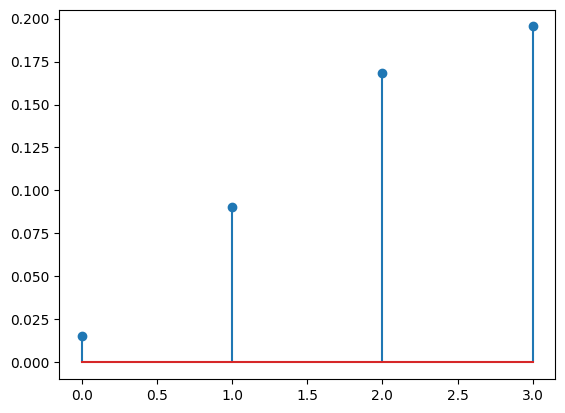

In [19]:
plt.stem(Like)

In [22]:
# Vamos a calcular la posterior
Posterior = Prior * Like / np.sum( Prior * Like  )

<StemContainer object of 3 artists>

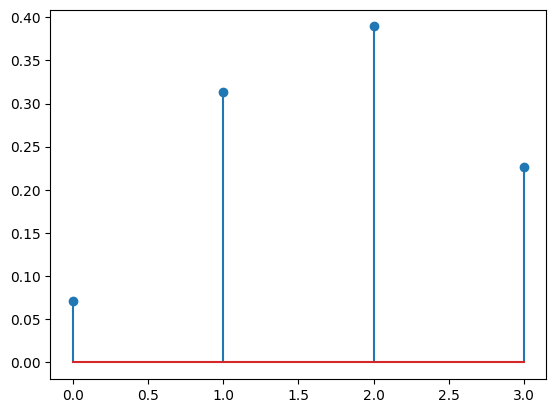

In [23]:
plt.stem(Posterior)

In [24]:
np.sum( Posterior * X )

np.float64(2.7707584253176796)

In [25]:
# Caso ovni,fantasma,particula

In [26]:
def Likelihood(mu,n,b,s):

  l = mu*s + b

  return np.exp(-l)*l**n / factorial(n)

In [83]:
# La Data
n = np.array([1,1]) #
b = np.array([0,0]) # Espero no medir fantasmas hoy
s = np.array([1,1])

In [84]:
# Necesitamos la probabilidad conjunta
def JointLikelihood(mu,n,b,s):

  Joint = 1

  for i in range(len(n)):

    Joint *= Likelihood(mu,n[i],b[i],s[i])

  return Joint

In [85]:
mu = np.linspace(0,7,50)
JointLike = JointLikelihood(mu,n,b,s)

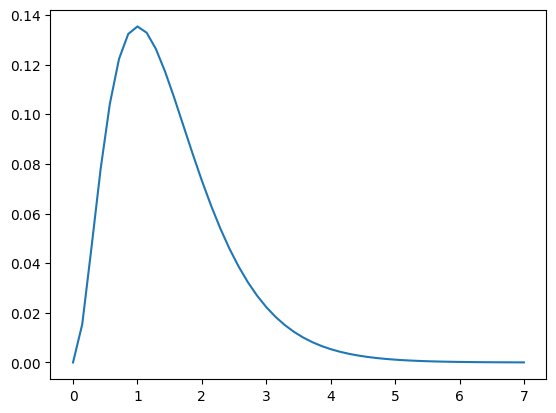

In [86]:
plt.plot(mu,JointLike)

In [87]:
ii = np.argmax(JointLike)
mu[ii]

np.float64(1.0)

In [88]:
# Necesitamos normalizar la posterior
probx = integrate.quad( JointLikelihood, 0, np.inf, args=(n,b,s) )[0]
probx

0.25000000000000006

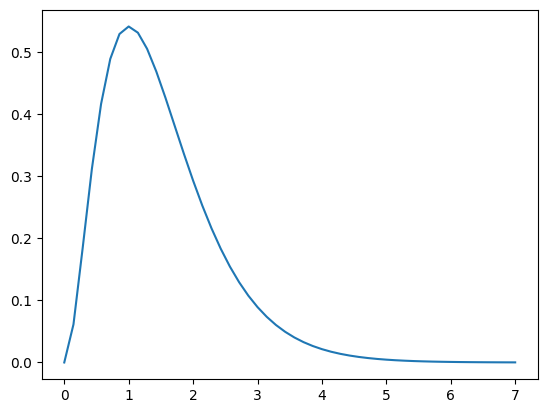

In [89]:
plt.plot(mu,JointLike/probx)